# Liczby Fibonacciego

https://en.wikipedia.org/wiki/Fibonacci_number

Liczby Fibonacciego to ciąg $(F_n)_{n\in\mathbb{N}}$ nieujemnych liczb całkowitych określonych wzorem

$F_{n}=\left\{\begin{array}{ll}
  n, & n=0,1\\
 F_{n-1}+F_{n-2}, & n\geq 2
 \end{array}
\right.$

## Wykres

Wyznaczmy przybliżony wykres zmienności elementów tego ciągu

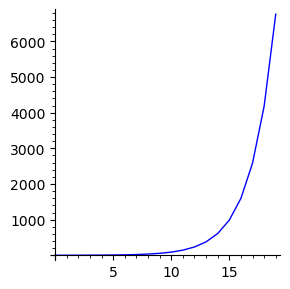

In [42]:
def fib1(n):
    if n<=1:
        return n
    return fib1(n-1)+fib1(n-2)
list_plot([fib1(n) for n in [1..20]],plotjoined=True,figsize=[3,3])

## Ilorazy

Ciekawe własności posiada ciąg ilorazów. Kolejne ilorazy $F_{n+1}/F_{n}$ zbiegają do pewnej stałej

**Pytanie**

*Co to za stała?*

In [20]:
def rat(n,prec):
    return RealField(prec)(fibonacci(n+1)/fibonacci(n))

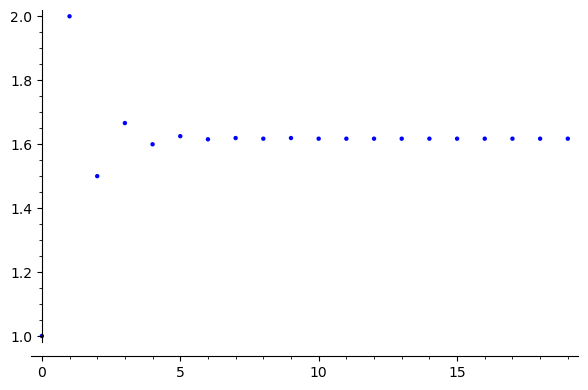

In [21]:
list_plot([rat(n,10) for n in [1..20]])

Wartość stałej zbieżności $\phi$ można oszacować tak, że $\phi\in [1.4,1.8]$.

In [43]:
print(rat(100,300))
print(rat(1000,300))
print(rat(10000,300))
print(rat(100000,300))

1.61803398874989484820458683436563811772031274396379568575359185108829019869887522987627156
1.61803398874989484820458683436563811772030917980576286213544862270526046281890244970720720
1.61803398874989484820458683436563811772030917980576286213544862270526046281890244970720720
1.61803398874989484820458683436563811772030917980576286213544862270526046281890244970720720


In [24]:
phi=rat(10000,300)
print(phi)

1.61803398874989484820458683436563811772030917980576286213544862270526046281890244970720720


## Formuła jawna

A czy można odtworzyć wzór jawny na kolejne liczby Fibonacciego?

Ich wzrost sugeruje, że mogłaby być to formuła wykładnicza, np. $F_n=A\cdot b^n$



In [1]:
A=var('A')
b=var('b')

def FibTest1(n):
    return A*b^n


FibTest1(0)==0 ##to nie wygląda interesująco...; musimy spróbować coś lepszego

A == 0

Może zatem ciąg Fibonacciego określony jest sumą dwóch wyrażeń wykładniczych?

$$F_n = A\cdot a_1^n+ B\cdot a_2 ^n$$

In [4]:
A,B=var('A,B')
a1,a2=var('a1,a2')

def FibTest2(n):
    return A*a1^n+B*a2^n


#warunki początkowe

war=[FibTest2(0)==0,FibTest2(1)==1]

#rekurencja
n=var('n')
rek=(FibTest2(n+2)-FibTest2(n+1)-FibTest2(n)==0)
     
pretty_print(war)
pretty_print(rek)

[A + B == 0, A*a1 + B*a2 == 1]

A*a1^(n + 2) - A*a1^(n + 1) - A*a1^n + B*a2^(n + 2) - B*a2^(n + 1) - B*a2^n == 0

Ok, stąd możemy już gdzieś wystartować. Pora na rachunki...

In [11]:
#Z warunków początkowych wynika, że A=-B. Podstawmy do drugiego równania

assert bool(war[0].subs({A:-B})) #sprawdzamy poprawność naszego podstawienia w pierwszym warunku

war[1].subs({A:-B})

#jeśli B nie jest zerem (gdyby było, to wówczas F_n = 0 dla dowolnego n - niemożliwe!)

eq1 = war[1].subs({A:-B}) #formujemy równanie do rozwiązania

solve(eq1,(a1)) #rozwiązanie możemy podstawić do rekurencji!

[a1 == (B*a2 - 1)/B]

In [12]:
rek.subs({a1:(B*a2-1)/B}) #ok, to wygląda na skomplikowane; czy możemy uprościć?



B*a2^(n + 2) - B*a2^(n + 1) - B*a2^n + A*((B*a2 - 1)/B)^(n + 2) - A*((B*a2 - 1)/B)^(n + 1) - A*((B*a2 - 1)/B)^n == 0

In [20]:
#wyrażenie powinno się zerować dla dowolnej wartości n. Zatem np. dla n=0
rek.subs({a1:(B*a2-1)/B,A:-B,n:0}).factor()

(2*B*a2 - B - 1)/B == 0

In [21]:
#wyznaczymy zatem wartość zmiennej a2

solve((2*B*a2 - B - 1),(a2))

[a2 == 1/2*(B + 1)/B]

In [26]:
#pozostała nam zmienna B do wyznaczenia; weźmy zatem n=1

rek.subs({a1:(B*a2-1)/B,A:-B}).subs({a2:1/2*(B + 1)/B,n:1}).factor()

-1/4*(5*B^2 - 1)/B^2 == 0

In [27]:
#Bingo, mamy zatem

solve(5*B^2 - 1,(B)) #dwa rozwiązania do wyboru

[B == -1/5*sqrt(5), B == 1/5*sqrt(5)]

In [5]:
#ostatecznie

wsp=[A==-B,a1==((B*a2 - 1)/B).subs({a2:1/2*(B + 1)/B}),a2==1/2*(B + 1)/B]

pretty_print([x.subs({B:1/5*sqrt(5)}).expand() for x in wsp])
pretty_print([x.subs({B:-1/5*sqrt(5)}).expand() for x in wsp])

[A == -1/5*sqrt(5), a1 == -1/2*sqrt(5) + 1/2, a2 == 1/2*sqrt(5) + 1/2]

[A == 1/5*sqrt(5), a1 == 1/2*sqrt(5) + 1/2, a2 == -1/2*sqrt(5) + 1/2]

Wygląda na to, że znaleźliśmy kandydata na formułę jawną na liczby Fibonacciego:

$$F_n = \frac{1}{\sqrt{5}}((\frac{1+\sqrt{5}}{2})^n-(\frac{1-\sqrt{5}}{2})^n)$$

Na ćwiczeniach sprawdzimy, że ta formuła działa dla **dowolnej wartości liczby n**.

Ciekawostka: formuła ta znana jest pod nazwą *wzoru Bineta*.

In [43]:
phi=(1+sqrt(5))/2
phi2=(1-sqrt(5))/2

def Binet(n):
    return 1/sqrt(5)*(phi^n-phi2^n)


print([Binet(i).expand() for i in [0..10]])
print([fib1(i) for i in [0..10]]) # wygląda na to, że formuła Bineta działa!

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Teraz możemy bez trudu udowodnić, że 

$$\lim_{n\rightarrow\infty}\frac{F_{n+1}}{F_n} = \frac{1+\sqrt{5}}{2}.$$

In [49]:
(Binet(n+1)/Binet(n)).limit(n=oo)

1/2*sqrt(5) + 1/2

Mając dostęp do formuły Bineta, możemy z łatwością weryfikować pewne tożsamości spełniane przez liczby Fibonacciego, np. tożsamość Cassiniego:


$$F_n^2 - F_{n+1}F_{n-1}=(-1)^{n-1}$$

In [55]:
(Binet(n)^2-Binet(n+1)*Binet(n-1)).simplify_full().simplify_real()

-(1/2*sqrt(5) + 1/2)^n*(-1/2*sqrt(5) + 1/2)^n

In [63]:
((1/2*sqrt(5) + 1/2)*(-1/2*sqrt(5) + 1/2)).expand()


-1

## Czego się nauczyliśmy?

1. W SageMath możemy wykonywać *symboliczne* rachunki na zmiennych, które są równoważne z prawdziwym dowodem matematycznym. 

2. Otrzymujemy formuły *dokładne*, które wyprowadzamy w sposób *ścisły*, opierając się na rachunkach *algebraicznych*. 

3. Nasze rozumowanie matematyczne miesza się z kodem w języku SageMath (Python + $\epsilon$). 

4. Dzięki temu zachowujemy ślad wszystkich operacji i minimalizujemy ryzyko błedu w rozumowaniu.

5. Otrzymujemy do naszych rąk potężne narzędzie, w którym formalne rozumowania możemy mieszać z heurystyką, która poprawia nasze zrozumienie zagadnienia.

## Zagadnienia

1. Obliczoną wcześniej w SageMath granicę ilorazu  $\lim_{n\rightarrow\infty}\frac{F_{n+1}}{F_{n}}$ zweryfikuj w pojedynczych krokach (bez użycia `limit`).
2. Uzasadnij formalnie wzór Bineta (sprawdź podstawiając do definicji liczb Fibonacciego, że wzór jest prawdziwy dla $n>=0$)
3. Czy podobne rozumowanie można przeprowadzić w przypadku innych wzorów rekurencyjnych? Jak by zmieniły się nasze kroki dla innych wartości początkowych?
